### Spatial and Temporal Analysis of Road Accidents in Greater London

In [1]:
import pandas as pd

In [2]:
dfmap = pd.read_excel('Road-Safety-Open-Dataset-Data-Guide.xlsx') # excel file for mapping values of road accident datasets
London_district =['City of London','Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 
                  'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 
                  'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 
                  'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 
                  'Wandsworth', 'Westminster'] # list of London boroughs
district_namesUK = dfmap[dfmap['field name'] == 'local_authority_district'][['code/format', 'label']].to_numpy()
num_London_districts = [x for  x, y in district_namesUK if y in  London_district]
df_list = []
for i in range(2018,2021): # for loop to append datasets in a list
    df = pd.read_csv('dft-road-casualty-statistics-accident-{}.csv'.format(i), dtype={"accident_index": 'object', "accident_reference": 'object',
                                                                                      'lsoa_of_accident_location':'object'})
    df_london = df[df['local_authority_district'].isin(num_London_districts)]
    df_list.append(df_london)
data = pd.concat(df_list, ignore_index = True)
data.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2018010080971,2018,010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000854
1,2018010080973,2018,010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,...,0,4,1,1,0,0,1,1,2,E01003531
2,2018010080974,2018,010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,...,5,4,1,1,0,0,1,1,2,E01002723
3,2018010080981,2018,010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,...,5,4,2,2,0,0,1,1,2,E01003492
4,2018010080982,2018,010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,...,0,4,1,2,0,0,1,1,2,E01001682


In [3]:
data = data.dropna() # dropping nulls
data.shape

(71897, 36)

In [4]:
data.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [5]:
#dropping unnecessary columns
data = data.drop(['location_easting_osgr', 'location_northing_osgr', 'local_authority_ons_district',
       'local_authority_highway', 'lsoa_of_accident_location'],1)

In [6]:
# Mapping data with coresponding categorical names
atribute_list_to_map = ['police_force', 'accident_severity', 'day_of_week','local_authority_district', 'first_road_class', 'road_type', 
                        'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
                        'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 
                        'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 
                        'did_police_officer_attend_scene_of_accident', 'trunk_road_flag']
for i in atribute_list_to_map:
    num = dfmap[dfmap['field name'] == i]['code/format']
    label = dfmap[dfmap['field name'] == i]['label']
    map_ = { x: y for x,y in zip(num,label)}
    data.loc[:,i] = data[i].map(map_).to_numpy()

In [7]:
data.insert(12, 'date_time',pd.to_datetime(data.date +' '+ data.time) ) # Creating date-time column

In [8]:
#data.to_csv('accidentLondon_2018_2020.csv')
data.reset_index(inplace = True)

In [9]:
# adding a season column to data frame
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['Spring']:
        return 'Spring'
    if date in seasons['Summer']:
        return 'Summer'
    if date in seasons['Autumn']:
        return 'Autumn'
    else:
        return 'Winter'

# Assuming df has a date column of type `datetime`
data['season'] = pd.to_datetime(data.date).map(season_of_date)
#reference: https://stackoverflow.com/a/53694615
data.season


0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
71892    Summer
71893    Autumn
71894    Spring
71895    Summer
71896    Autumn
Name: season, Length: 71897, dtype: object

In [10]:
import numpy as np
data['month'] = data.date_time.dt.month_name()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data['month'], categories=order, ordered=True) # Ordering categories for months

c_s = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=c_s, ordered=True) # Ordering categories for weekdays

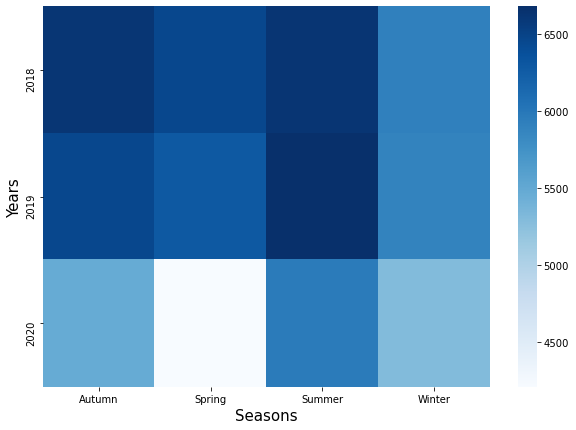

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
p_table = pd.pivot_table(data = data, values = 'accident_index', index = 'accident_year', columns = 'season', aggfunc = 'count')

plt.figure(figsize=(10,7))
sns.heatmap(p_table, cmap = 'Blues');
plt.xlabel('Seasons', fontsize = 15);
plt.ylabel('Years', fontsize = 15);

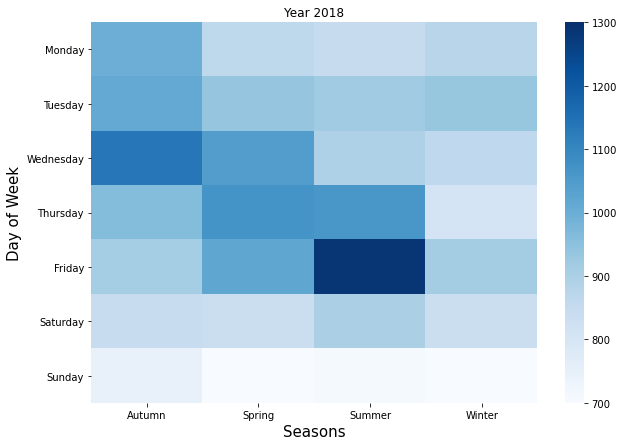

In [12]:
p_table = pd.pivot_table(data = data[data.accident_year == 2018], values = 'accident_index', index = 'day_of_week', columns = 'season', aggfunc = 'count')

plt.figure(figsize=(10,7))
sns.heatmap(p_table, cmap = 'Blues', vmin = 700, vmax = 1300);
plt.title('Year 2018');
plt.xlabel('Seasons', fontsize = 15);
plt.ylabel('Day of Week', fontsize = 15);

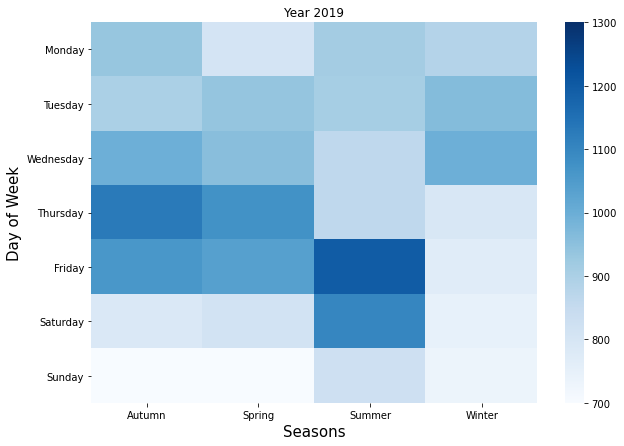

In [13]:
p_table = pd.pivot_table(data = data[data.accident_year == 2019], values = 'accident_index', index = 'day_of_week', columns = 'season', aggfunc = 'count')

plt.figure(figsize=(10,7))
sns.heatmap(p_table, cmap = 'Blues', vmin = 700, vmax = 1300);
plt.title('Year 2019');
plt.xlabel('Seasons', fontsize = 15);
plt.ylabel('Day of Week', fontsize = 15);

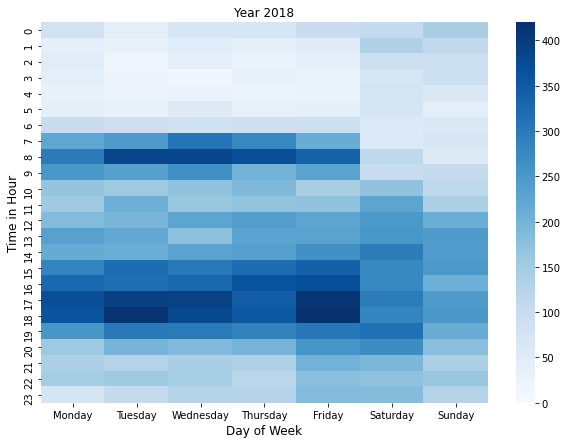

In [14]:
data['time_num'] = data.date_time.dt.hour
p_table= pd.pivot_table(data = data[data.accident_year == 2018], values = 'number_of_casualties', index = 'time_num', columns = 'day_of_week', aggfunc =np.sum)

plt.figure(figsize=(10,7))
sns.heatmap(p_table, cmap = 'Blues', vmin = 0, vmax = 420);
plt.title('Year 2018');
plt.ylabel('Time in Hour', fontsize = 12);
plt.xlabel('Day of Week', fontsize = 12);

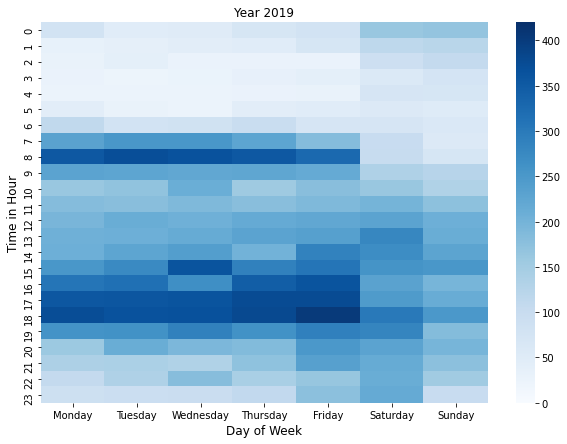

In [15]:
p_table= pd.pivot_table(data = data[data.accident_year == 2019], values = 'number_of_casualties', index = 'time_num', columns = 'day_of_week', aggfunc =np.sum)

plt.figure(figsize=(10,7))
sns.heatmap(p_table, cmap = 'Blues', vmin = 0, vmax = 420);
plt.title('Year 2019');
plt.ylabel('Time in Hour', fontsize = 12);
plt.xlabel('Day of Week', fontsize = 12);

In [16]:
# Cluster the data
from sklearn.cluster import DBSCAN # density based clustering
import math
eps_in_meters = 100.0
n_neighbours = 10

earth_perimeter = 40070000.0  # In meters
eps_in_radians = eps_in_meters / earth_perimeter * (2 * math.pi)
loc_rad= pd.DataFrame({'lat_rad':data['latitude']*np.pi/180})
loc_rad['long_rad'] = data['longitude']*np.pi/180
# reference: https://gist.github.com/joaofig/8ca9cf170eadee2f09b2a7643b70b6ab#file-run_dbscan_sklearn-py
clustered_S = DBSCAN(eps=eps_in_radians, min_samples=n_neighbours, metric='haversine').fit(loc_rad)

print('Clustering finished!')

labels=clustered_S.labels_
unique_labels=np.unique(clustered_S.labels_)
print('Result: {} records in the noise, labelled as -1, and {} clusters labelled as 0..{}'.
      format(data[labels==-1].shape[0], len(unique_labels)-1, len(unique_labels)-2))
clust_id_col_name='ClusterNN'
data[clust_id_col_name]=labels
# reference: Visual Analytics lab

Clustering finished!
Result: 32609 records in the noise, labelled as -1, and 1173 clusters labelled as 0..1172


In [17]:
#data.to_csv('data_clustered.csv') # save clustered data

In [18]:
#replacing cluster numbers with it's size
c_count=pd.DataFrame(data.ClusterNN.value_counts()).reset_index()
map_c= {x:y for x,y in zip(c_count['index'].to_numpy(),c_count['ClusterNN'].to_numpy())}
data['ClusterNN'] = data['ClusterNN'].map(map_c)

In [19]:
#Ordering weather categories
ordered_c = ['Unknown', 'Other', 'Fine no high winds', 'Fine + high winds', 'Raining no high winds', 
             'Raining + high winds', 'Fog or mist', 'Snowing no high winds', 'Snowing + high winds']
data['weather_conditions'] = pd.Categorical(data['weather_conditions'], categories=ordered_c, ordered=True) 

<ipython-input-20-fc948ae3c4ea>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 15)


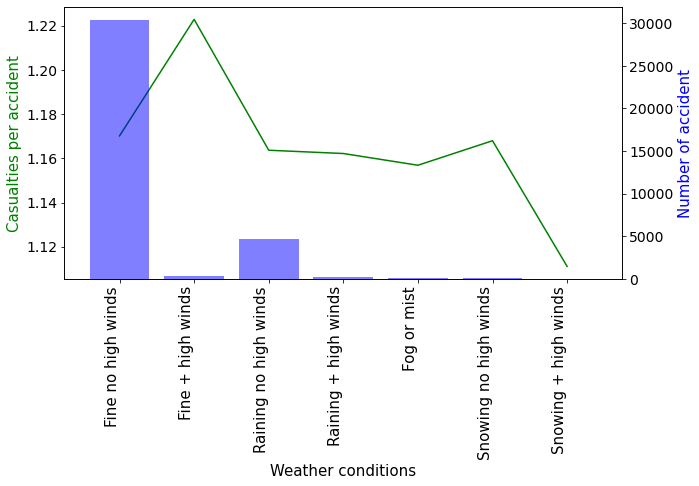

In [20]:
df_weather = pd.DataFrame({'weather_conditions':data[(data.ClusterNN < 2000) ].weather_conditions.sort_values().unique()})
df_weather['num_accident'] = data[(data.ClusterNN < 2000) ].groupby('weather_conditions').count()['accident_reference'].to_numpy()
df_weather['tot_casualties'] = data[(data.ClusterNN < 2000) ].groupby('weather_conditions')['number_of_casualties'].sum().to_numpy()
df_weather['tot_casualties/num_accident'] = df_weather['tot_casualties']/df_weather['num_accident']
#print(df_weather)
fig, ax = plt.subplots(figsize = (10, 5))
plt.yticks(fontsize =14);
ax2 = ax.twinx()
ax.plot(df_weather.loc[2:,'weather_conditions'], df_weather.loc[2:,'tot_casualties/num_accident'], color = 'g')
ax2.bar(df_weather.loc[2:,'weather_conditions'],df_weather.loc[2:,'num_accident'], alpha = 0.5, color = 'b')
ax.set_xlabel('Weather conditions', fontsize = 15)
ax.set_ylabel('Casualties per accident', color = 'g', fontsize = 15)
ax2.set_ylabel('Number of accident', color = 'b', fontsize = 15)
labels = ['Fine no high winds', 'Fine + high winds',
       'Raining no high winds', 'Raining + high winds', 'Fog or mist',
       'Snowing no high winds', 'Snowing + high winds']
ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 15)
#plt.ylabel('Casualties per accident', fontsize = 15);
#plt.xlabel('Weather conditions', fontsize = 15);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.show()

In [21]:

df_junction_detail = pd.DataFrame({'junction_detail':data[(data.ClusterNN < 2000) ].junction_detail.sort_values().unique()})
df_junction_detail['num_accident'] = data[(data.ClusterNN < 2000) ].groupby('junction_detail').count()['accident_reference'].to_numpy()
df_junction_detail['tot_vehicles'] = data[(data.ClusterNN < 2000) ].groupby('junction_detail')['number_of_vehicles'].sum().to_numpy()
df_junction_detail['tot_casualties'] = data[(data.ClusterNN < 2000) ].groupby('junction_detail')['number_of_casualties'].sum().to_numpy()
df_junction_detail['tot_vehicles/num_accident'] = df_junction_detail['tot_vehicles']/df_junction_detail['num_accident']
df_junction_detail['tot_casualties/num_accident'] = df_junction_detail['tot_casualties']/df_junction_detail['num_accident']
df_junction_detail

,junction_detail,num_accident,tot_vehicles,tot_casualties,tot_vehicles/num_accident,tot_casualties/num_accident
0,Crossroads,6428,11637,7644,1.810361,1.189172
1,Mini-roundabout,372,664,418,1.784946,1.123656
2,More than 4 arms (not roundabout),1754,3126,2110,1.782212,1.202965
3,Not at junction or within 20 metres,7916,13926,9361,1.759222,1.182542
4,Other junction,2835,4978,3310,1.755908,1.167549
5,Private drive or entrance,504,898,572,1.781746,1.134921
6,Roundabout,2946,5465,3513,1.855058,1.192464
7,Slip road,891,1686,1118,1.892256,1.254770
8,T or staggered junction,13732,24305,15656,1.769953,1.140111
9,unknown (self reported),1910,3412,2101,1.786387,1.100000


<ipython-input-22-c4cf2406f4fc>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 15)


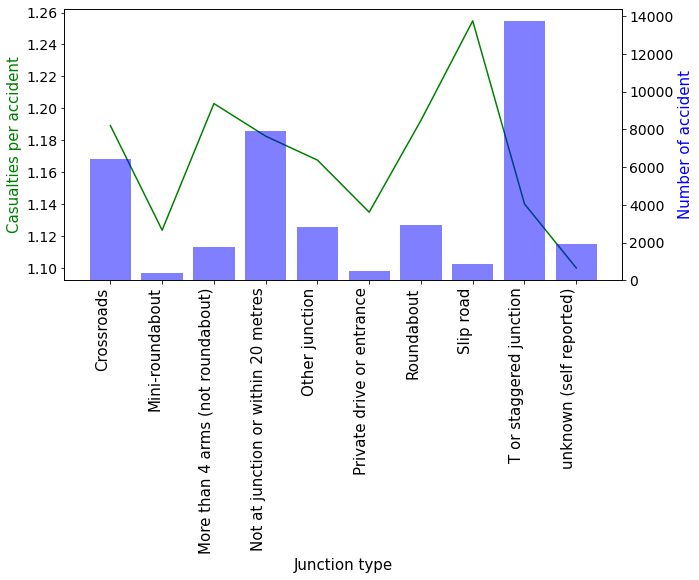

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.yticks(fontsize =14);
ax2 = ax.twinx()
ax.plot(df_junction_detail.loc[:,'junction_detail'], df_junction_detail.loc[:,'tot_casualties/num_accident'], color = 'g')
ax2.bar(df_junction_detail.loc[:,'junction_detail'],df_junction_detail.loc[:,'num_accident'], alpha = 0.5, color = 'b')
ax.set_xlabel('Junction type', fontsize = 15)
ax.set_ylabel('Casualties per accident', color = 'g', fontsize = 15)
ax2.set_ylabel('Number of accident', color = 'b', fontsize = 15)
labels = ['Crossroads', 'Mini-roundabout',
       'More than 4 arms (not roundabout)',
       'Not at junction or within 20 metres', 'Other junction',
       'Private drive or entrance', 'Roundabout', 'Slip road',
       'T or staggered junction', 'unknown (self reported)']
ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 15)
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.show()

In [23]:
df_speed = pd.DataFrame({'speed_limit':data.speed_limit.sort_values().unique()})
df_speed['num_accident'] = data.groupby('speed_limit').count()['accident_reference'].to_numpy()
df_speed['tot_casualties'] = data.groupby('speed_limit')['number_of_casualties'].sum().to_numpy()
df_speed['tot_casualties/num_accident'] = df_speed['tot_casualties']/df_speed['num_accident']
df_speed['tot_vehicles'] = data.groupby('speed_limit')['number_of_vehicles'].sum().to_numpy()
df_speed['tot_vehicles/num_accident'] = df_speed['tot_vehicles']/df_speed['num_accident']
df_speed

,speed_limit,num_accident,tot_casualties,tot_casualties/num_accident,tot_vehicles,tot_vehicles/num_accident
0,-1,77,82,1.064935,115,1.493506
1,20,21420,24246,1.131933,38073,1.777451
2,30,44407,52312,1.178012,79599,1.792488
3,40,3542,4680,1.321287,7075,1.997459
4,50,1783,2577,1.445317,3897,2.185642
5,60,142,187,1.316901,286,2.014085
6,70,526,800,1.520913,1226,2.330798


In [24]:
import statsmodels.api as sm
df_speed['ones']=1 # adding constant
model = sm.OLS(df_speed.loc[1:,'tot_casualties/num_accident'],df_speed.loc[1:,['speed_limit','ones']]).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     tot_casualties/num_accident   R-squared:                       0.791
Model:                                     OLS   Adj. R-squared:                  0.739
Method:                          Least Squares   F-statistic:                     15.12
Date:                         Sun, 27 Feb 2022   Prob (F-statistic):             0.0177
Time:                                 19:31:13   Log-Likelihood:                 8.1336
No. Observations:                            6   AIC:                            -12.27
Df Residuals:                                4   BIC:                            -12.68
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
speed_limit     0.0071      0.002      3.889      0.018       0.002       0.012
ones            0.9995      0.088     11.371      0.000       0.755       1.244
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.832
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.237
Skew:                          -0.350   Prob(JB):                        0.888
Kurtosis:                       2.324   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model = sm.OLS(df_speed.loc[1:,'tot_vehicles/num_accident'],df_speed.loc[1:,['speed_limit','ones']]).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     tot_vehicles/num_accident   R-squared:                       0.796
Model:                                   OLS   Adj. R-squared:                  0.745
Method:                        Least Squares   F-statistic:                     15.63
Date:                       Sun, 27 Feb 2022   Prob (F-statistic):             0.0168
Time:                               19:31:13   Log-Likelihood:                 5.9769
No. Observations:                          6   AIC:                            -7.954
Df Residuals:                              4   BIC:                            -8.370
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
speed_limit     0.0103      0.003      3.953      0.017       0.003       0.018
ones            1.5509      0.126     12.317      0.000       1.201       1.901
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.056
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.472
Skew:                          -0.555   Prob(JB):                        0.790
Kurtosis:                       2.190   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

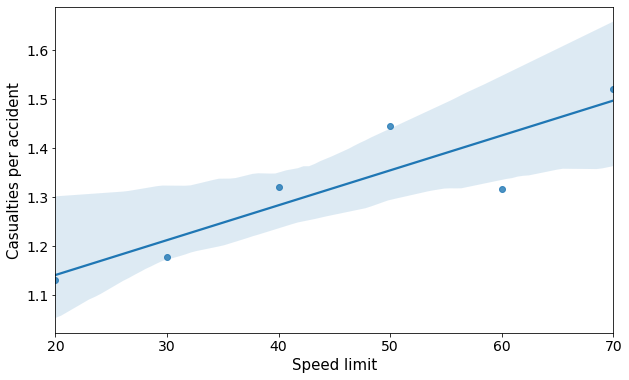

In [26]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df_speed.loc[1:,:], x= 'speed_limit', y = 'tot_casualties/num_accident');
plt.xlabel('Speed limit', fontsize =15)
plt.ylabel('Casualties per accident', fontsize =15)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.show()

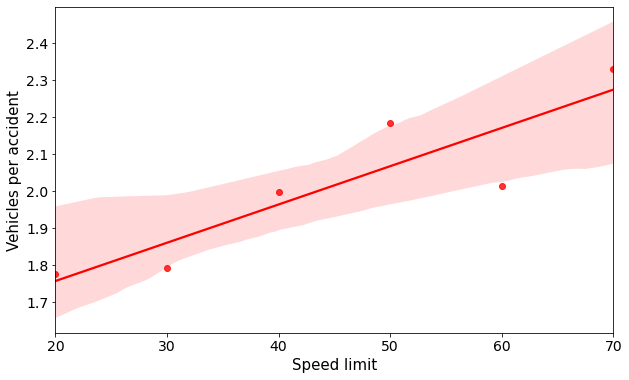

In [27]:
plt.figure(figsize = (10, 6))
sns.regplot(data = df_speed.loc[1:,:], x= 'speed_limit', y = 'tot_vehicles/num_accident', color = 'r');
plt.xlabel('Speed limit', fontsize =15);
plt.ylabel('Vehicles per accident', fontsize =15)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.show()

In [28]:
import folium
from folium.plugins import HeatMap
df_Westminster = data[(data.local_authority_district=='Westminster')|(data.local_authority_district=='Camden')]
xmm=(df_Westminster.longitude.min()+df_Westminster.longitude.max())/2
ymm=(df_Westminster.latitude.min()+df_Westminster.latitude.max())/2

hmap = folium.Map(location=[ymm,xmm], tiles ='cartodbpositron', zoom_start=13, width=500,height=600)
hm_wide = HeatMap(list(zip(df_Westminster.latitude.values, df_Westminster.longitude.values)), 
                  min_opacity=0.3,
                  #radius=5,
                  radius=5,
                  blur=9
                  #Adjusting the radius will make areas more distict, and reducing blur will make map clearer!
                 )
hmap.add_child(hm_wide)
# reference: Visual Analytics Lab

In [29]:
#hmap.save("heatmapWestministerCamden.png") # Saving heatmap